In [1]:
#Import all the libraries needed
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#with pandas we read the file and rename it as df
df= pd.DataFrame(pd.read_csv('stress_train.csv'))
df.head()

,age,workclass,education,education_years,marital_status,occupation,relationship,race,sex,hours_week,country,permit,stress
0,43,Private,HS-grad,9,Divorced,Transport-moving,Not-in-family,NaN,Male,16,United-States,B,0
1,31,Self-emp-not-inc,Some-college,10,Married-civ-spouse,Craft-repair,Husband,NaN,Male,40,United-States,D,0
2,47,Self-emp-not-inc,Some-college,10,Divorced,Exec-managerial,Not-in-family,NaN,Female,65,United-States,C,0
3,32,Private,HS-grad,9,Never-married,Sales,Own-child,NaN,Female,35,United-States,B,0
4,25,State-gov,Some-college,10,Divorced,Protective-serv,Other-relative,NaN,Male,45,United-States,A,0


In [3]:
#ask info on the database
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15164 entries, 0 to 15163
Data columns (total 13 columns):
age                15164 non-null int64
workclass          14228 non-null object
education          15164 non-null object
education_years    15164 non-null int64
marital_status     15164 non-null object
occupation         14224 non-null object
relationship       15164 non-null object
race               2328 non-null object
sex                15164 non-null object
hours_week         15164 non-null int64
country            14901 non-null object
permit             15164 non-null object
stress             15164 non-null int64
dtypes: int64(4), object(9)
memory usage: 1.5+ MB


In [4]:
#sum of the null values for each column
df.isna().sum()

age                    0
workclass            936
education              0
education_years        0
marital_status         0
occupation           940
relationship           0
race               12836
sex                    0
hours_week             0
country              263
permit                 0
stress                 0
dtype: int64

In [5]:
#delete the "race" column that contains 12836 null values
df.drop(["race"],axis='columns', inplace =True)
df.head()

,age,workclass,education,education_years,marital_status,occupation,relationship,sex,hours_week,country,permit,stress
0,43,Private,HS-grad,9,Divorced,Transport-moving,Not-in-family,Male,16,United-States,B,0
1,31,Self-emp-not-inc,Some-college,10,Married-civ-spouse,Craft-repair,Husband,Male,40,United-States,D,0
2,47,Self-emp-not-inc,Some-college,10,Divorced,Exec-managerial,Not-in-family,Female,65,United-States,C,0
3,32,Private,HS-grad,9,Never-married,Sales,Own-child,Female,35,United-States,B,0
4,25,State-gov,Some-college,10,Divorced,Protective-serv,Other-relative,Male,45,United-States,A,0


In [6]:
#basic statistical description of the database
df.describe(include="all")

,age,workclass,education,education_years,marital_status,occupation,relationship,sex,hours_week,country,permit,stress
count,15164.000000,14228,15164,15164.000000,15164,14224,15164,15164,15164.000000,14901,15164,15164.000000
unique,NaN,8,16,NaN,5,14,6,2,NaN,40,5,NaN
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Adm-clerical,Husband,Male,NaN,United-States,C,NaN
freq,NaN,10715,4890,NaN,6080,2197,4666,7607,NaN,13596,3086,NaN
mean,38.211949,NaN,NaN,10.082036,NaN,NaN,NaN,NaN,39.496835,NaN,NaN,0.211817
std,13.769714,NaN,NaN,2.506576,NaN,NaN,NaN,NaN,12.407518,NaN,NaN,0.408610
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000
25%,27.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,36.000000,NaN,NaN,0.000000
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,40.000000,NaN,NaN,0.000000
75%,47.000000,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,43.000000,NaN,NaN,0.000000


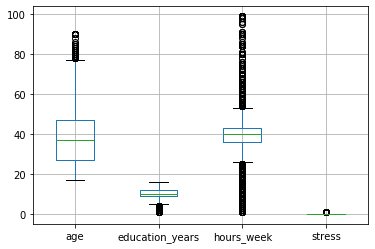

In [7]:
df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018AB33BB9E8>]],
      dtype=object)

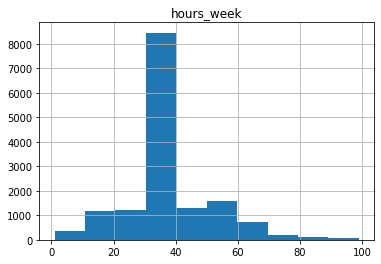

In [8]:
df.hist('hours_week')

In [9]:
#creation and adjustment of the independent variable part of the dataset
X = pd.get_dummies(df, columns=['workclass','education','marital_status',
                                'occupation','relationship','sex','country','permit'],drop_first=True) 




In [10]:
X = X.drop(['stress'], axis=1)

In [11]:
X

,age,education_years,hours_week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,...,country_Taiwan,country_Thailand,country_Trinadad&Tobago,country_United-States,country_Vietnam,country_Yugoslavia,permit_B,permit_C,permit_D,permit_M
0,43,9,16,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,31,10,40,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,47,10,65,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,32,9,35,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,25,10,45,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5,33,10,40,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
6,26,13,25,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,38,13,50,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
8,43,5,50,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
9,23,10,35,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [12]:
#dependent variable
y = df['stress']

In [13]:
y

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        1
8        0
9        0
10       0
11       0
12       0
13       1
14       0
15       0
16       0
17       0
18       0
19       0
20       1
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
15134    0
15135    0
15136    0
15137    0
15138    0
15139    0
15140    0
15141    0
15142    0
15143    0
15144    0
15145    0
15146    0
15147    1
15148    0
15149    0
15150    0
15151    0
15152    1
15153    0
15154    0
15155    0
15156    1
15157    0
15158    0
15159    0
15160    0
15161    0
15162    0
15163    0
Name: stress, Length: 15164, dtype: int64

stress
0    11952
1     3212
dtype: int64


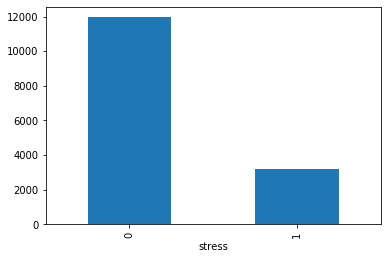

In [14]:
# proportion of  0 and q in the dependent variable
y_features = df.groupby("stress").size()
print(y_features)
y_features.plot.bar(x="",y="",title="")

In [15]:
# Divide test and Training set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,
                                                test_size= 0.3,
                                                stratify=y,
                                                random_state=0)

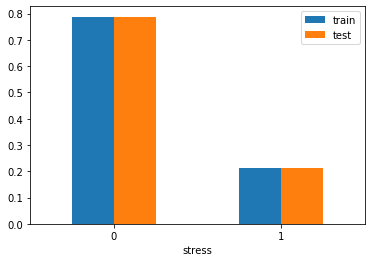

In [16]:
#Check if the proportion are kept 
y_train_dist=y_train.groupby(y_train.iloc[:]).size()/y_train.size
y_test_dist=y_test.groupby(y_test.iloc[:]).size()/y_test.size

train_test_dist = pd.DataFrame({'train': y_train_dist, 'test': y_test_dist})
ax = train_test_dist.plot.bar(rot=0) # rotation of the labels

In [17]:
#feature scaling (not so useful for the randomForest)
from sklearn.preprocessing import StandardScaler
sc =  StandardScaler()
X_train_scaled= sc.fit_transform(X_train)
X_test_scaled= sc.transform(X_test)

{'whiskers': [<matplotlib.lines.Line2D at 0x18ab53c2e80>,
 'caps': [<matplotlib.lines.Line2D at 0x18ab53de5c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18ab533d7f0>,
 'medians': [<matplotlib.lines.Line2D at 0x18ab53dec50>,
 'fliers': [<matplotlib.lines.Line2D at 0x18ab53def98>,
 'means': []}

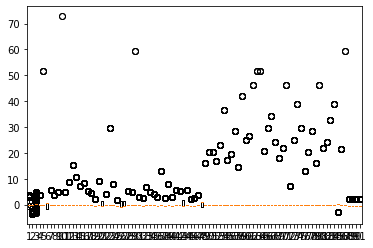

In [18]:
plt.boxplot(X_train_scaled)

In [19]:
#applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=60)
X_train_scaled_pca=pca.fit_transform(X_train_scaled)
X_test_scaled_pca= pca.transform(X_test_scaled)
explained_variance= pca.explained_variance_ratio_

In [20]:
explained_variance

array([0.03605985, 0.02972749, 0.02342881, 0.02140079, 0.01825308,
       0.01755563, 0.01571274, 0.01472482, 0.0144933 , 0.01420652,
       0.01402527, 0.0139494 , 0.01361938, 0.01348296, 0.0132145 ,
       0.01309889, 0.01290398, 0.0127479 , 0.01258238, 0.01257384,
       0.01239619, 0.01235628, 0.01213208, 0.01204095, 0.01195288,
       0.01188049, 0.01184643, 0.01173801, 0.01164748, 0.01156963,
       0.01148494, 0.01145388, 0.01134747, 0.01123014, 0.01112758,
       0.01107575, 0.01104649, 0.01101879, 0.01100648, 0.01099654,
       0.01098908, 0.01097804, 0.01096639, 0.01096148, 0.01095129,
       0.01092246, 0.01090184, 0.01087387, 0.01085786, 0.01085329,
       0.01079611, 0.01077437, 0.01066881, 0.01063971, 0.01057822,
       0.01056269, 0.01053271, 0.01043015, 0.01040481, 0.01036644])

# MODEL

In [21]:
#RANDOM FOREST CLASSIFIER
weights = {0:'0.24',1:'0.76'}
from sklearn.ensemble import RandomForestClassifier
classifier =RandomForestClassifier(bootstrap=True, class_weight=weights,
                       criterion='entropy', max_depth=None, max_features=25,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=7,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=50, n_jobs=None, oob_score=False,
                       random_state=0, verbose=0, warm_start=False)
classifier.fit(X_train_scaled,y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: '0.24', 1: '0.76'},
                       criterion='entropy', max_depth=None, max_features=25,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=7,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=50, n_jobs=None, oob_score=False,
                       random_state=0, verbose=0, warm_start=False)

In [22]:
y_pred = classifier.predict(X_test_scaled)

In [23]:
#La confusion matrix ci da un primo check e valutazione sulla bontà del nostro modello, possiamo dedurre quanta accuratezza,
#precisione, recall... ci sono, meglio che i numeri sull'antidiagonale siano bassi
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[3018,  568],
       [ 208,  756]], dtype=int64)

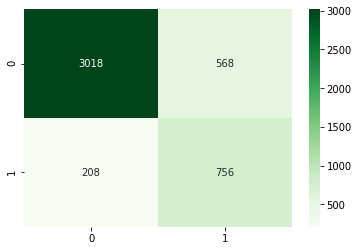

In [24]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Greens");

In [25]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
f1_array = cross_val_score(estimator = classifier, 
                             X = X_train_scaled, y = y_train, cv = 10, scoring='f1')
print("standard deviation is: {}, the mean is: {}".format(f1_array.std(),f1_array.mean()) )

standard deviation is: 0.01910302333040031, the mean is: 0.6665291986492659


In [26]:
f1_array.sort()
f1_array

array([0.64074074, 0.6487524 , 0.64963504, 0.66044776, 0.66176471,
       0.66300366, 0.6654479 , 0.67657993, 0.69500924, 0.70391061])

In [27]:
from sklearn import metrics
score_test = metrics.f1_score(y_test, y_pred)

print(score_test)

0.6608391608391608


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      3586
           1       0.57      0.78      0.66       964

    accuracy                           0.83      4550
   macro avg       0.75      0.81      0.77      4550
weighted avg       0.86      0.83      0.84      4550



In [29]:
#Grid Search and tuning phase
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators':[52,50,48],
               'class_weight':[{0:'0.24',1:'0.76'}],
               'criterion':['entropy'],
               'max_features':[25,26,24],
               'min_samples_split' : [2,4,6],
               'min_samples_leaf':[7,2,4]}]
gs = GridSearchCV(estimator= classifier,
                  param_grid= parameters,
                  scoring = 'f1',
                  cv= 10,
                  n_jobs=-1)
gs= gs.fit(X_train_scaled, y_train)
best_f1= gs.best_score_
best_parameters= gs.best_params_

#solver':['newton-cg','lbfgs','liblinear','sag','saga']

In [30]:
best_f1

0.6665283699639315

In [31]:
best_parameters

{'class_weight': {0: '0.24', 1: '0.76'},
 'criterion': 'entropy',
 'max_features': 25,
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'n_estimators': 50}

In [32]:
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

***GRIDSEARCH RESULTS***
Best score: 0.666528 using {'class_weight': {0: '0.24', 1: '0.76'}, 'criterion': 'entropy', 'max_features': 25, 'min_samples_leaf': 7, 'min_samples_split': 2, 'n_estimators': 50}
0.665059 (0.019233) with: {'class_weight': {0: '0.24', 1: '0.76'}, 'criterion': 'entropy', 'max_features': 25, 'min_samples_leaf': 7, 'min_samples_split': 2, 'n_estimators': 52}
0.666528 (0.019104) with: {'class_weight': {0: '0.24', 1: '0.76'}, 'criterion': 'entropy', 'max_features': 25, 'min_samples_leaf': 7, 'min_samples_split': 2, 'n_estimators': 50}
0.666280 (0.019641) with: {'class_weight': {0: '0.24', 1: '0.76'}, 'criterion': 'entropy', 'max_features': 25, 'min_samples_leaf': 7, 'min_samples_split': 2, 'n_estimators': 48}
0.665059 (0.019233) with: {'class_weight': {0: '0.24', 1: '0.76'}, 'criterion': 'entropy', 'max_features': 25, 'min_samples_leaf': 7, 'min_samples_split': 4, 'n_estimators': 52}
0.666528 (0.019104) with: {'class_weight': {0: '0.24', 1: '0.76'}, 'criterion': 'ent

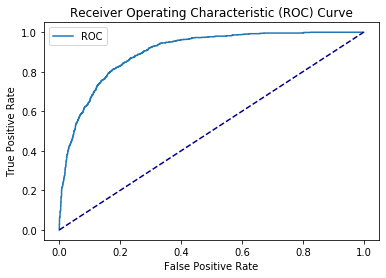

AUC: 0.90


In [33]:
#ROC curve

from sklearn import metrics

y_probs = classifier.predict_proba(X_test_scaled) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])


import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)